In [1]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sqrt
from math import log2
from collections import defaultdict
from collections import Counter
from functools import reduce
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv('douban_top250.csv')
df.loc[0]


title                                                       肖申克的救赎
link                     https://movie.douban.com/subject/1292052/
score                                                          9.7
score_cnt                                               1666344人评价
top_no                                                           1
director                                              ['弗兰克·德拉邦特']
writers                                      ['弗兰克·德拉邦特', '斯蒂芬·金']
actors           ['蒂姆·罗宾斯', '摩根·弗里曼', '鲍勃·冈顿', '威廉姆·赛德勒', '克兰西·...
types                                                 ['剧情', '犯罪']
edit_location                                                   美国
language                                                        英语
dates                                             ['1994', '1994']
play_location                                     ['多伦多电影节', '美国']
length                                                         142
rating_per              ['84.7%', '13.7%', '1.4%', '0.1%', '0.

In [2]:
df.loc[0, 'director']


"['弗兰克·德拉邦特']"

In [3]:
# 评分人数：x人评价清洗为x，并调整为int类型
df['score_cnt'] = df['score_cnt'].map(lambda x: int(x[:-3]))
df.describe()['score_cnt']

# 将字符串改为列表
df_tmp = df[['director', 'writers', 'actors', 'types',
             'dates', 'play_location', 'rating_per', 'betters', 'tags']]
df[['director', 'writers', 'actors', 'types', 'dates', 'play_location',
    'rating_per', 'betters', 'tags']] = df_tmp.applymap(lambda x: eval(x))

# 上映年份由字符串转换为int类型
df['dates'] = df['dates'].map(lambda x: [int(i) for i in x])
df['year'] = df['dates'].map(lambda x: min(x))

# 五星比例/好评比例
df['five_star_rate'] = df['rating_per'].map(lambda x: float(x[0][:-1])/100)
df['favor_rate'] = df['rating_per'].map(
    lambda x: (float(x[0][:-1]) + float(x[1][:-1]))/100)

# 比百分之多少同类电影好
df['better_than'] = df['betters'].map(
    lambda x: sum([int(i.split('%')[0]) for i in x])/len(x))

# 消灭空格
df['director'] = df['director'].map(lambda x: [i.strip() for i in x])

# reduce迭代获取所有导演的列表
director_list = reduce(lambda x, y: x + y, df.director)
print(len(director_list))


281


In [4]:

# 划定一个标准，在TOP250中有不少于3部电影的导演，才可以参与最佳导演评选
dire_counter = Counter(director_list)
dire_counter = sorted(dire_counter.items(), key=lambda x: x[1], reverse=True)
top_directors = list(filter(lambda x: x[1] >= 3, dire_counter))
print(top_directors)


[('宫崎骏', 7), ('史蒂文·斯皮尔伯格', 7), ('克里斯托弗·诺兰', 7), ('李安', 5), ('王家卫', 5), ('大卫·芬奇', 4), ('詹姆斯·卡梅隆', 3), ('朱塞佩·托纳多雷', 3), ('刘镇伟', 3), ('弗朗西斯·福特·科波拉', 3), ('彼得·杰克逊', 3), ('姜文', 3), ('彼特·道格特', 3), ('李·昂克里奇', 3), ('昆汀·塔伦蒂诺', 3), ('理查德·林克莱特', 3), ('是枝裕和', 3), ('吴宇森', 3)]


Text(0.5, 1.0, '豆瓣电影TOP250入榜最多导演情况')

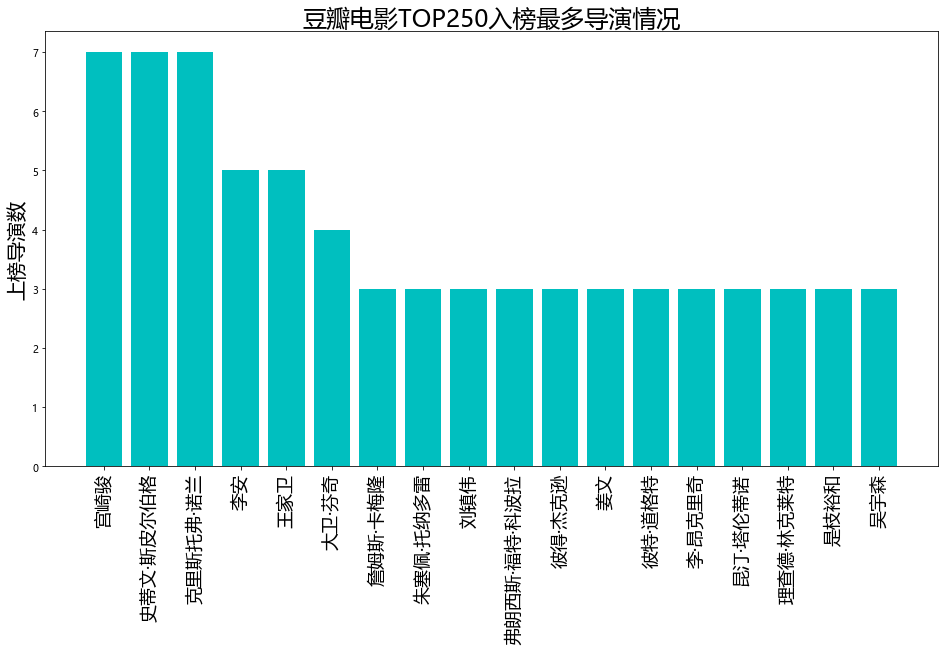

In [5]:
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 入榜导演排行
top_director_name = [i[0] for i in top_directors]
top_director_cnt = [i[1] for i in top_directors]

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(top_director_name, top_director_cnt, color='c')
ax.set_xticklabels(labels=top_director_name, 
                   fontdict={
                       'fontsize': 18, 
                       'rotation': 'vertical'
                   })
plt.ylabel('上榜导演数', fontsize=20)
plt.title('豆瓣电影TOP250入榜最多导演情况', fontsize=24)


In [6]:

top_dire_score = defaultdict(list)
top_dire_ind = defaultdict(list)
for name, cnt in top_directors:
    for index, row in df.iterrows():
        if name in row['director']:
            top_dire_score[name].append(row['score'])
            top_dire_ind[name].append(row['top_no'])
print(top_dire_score)  # 评分
print(top_dire_ind)  # 榜单位置


defaultdict(<class 'list'>, {'宫崎骏': [9.3, 9.2, 9.1, 9.0, 8.9, 8.8, 8.6], '史蒂文·斯皮尔伯格': [9.5, 9.0, 8.9, 8.8, 8.7, 8.6, 8.6], '克里斯托弗·诺兰': [9.3, 9.3, 9.2, 8.8, 8.7, 8.6, 8.9], '李安': [9.0, 9.1, 8.8, 8.9, 8.4], '王家卫': [8.9, 8.7, 8.6, 8.6, 8.5], '大卫·芬奇': [9.0, 8.9, 8.8, 8.7], '詹姆斯·卡梅隆': [9.4, 8.7, 8.7], '朱塞佩·托纳多雷': [9.2, 9.2, 8.8], '刘镇伟': [9.2, 9.0, 8.7], '弗朗西斯·福特·科波拉': [9.3, 9.2, 8.8], '彼得·杰克逊': [9.2, 9.0, 9.0], '姜文': [9.2, 8.8, 8.8], '彼特·道格特': [9.0, 8.7, 8.7], '李·昂克里奇': [9.0, 8.7, 8.8], '昆汀·塔伦蒂诺': [8.8, 8.7, 8.5], '理查德·林克莱特': [8.8, 8.8, 8.8], '是枝裕和': [9.1, 8.7, 8.8], '吴宇森': [8.7, 8.8, 8.5]})
defaultdict(<class 'list'>, {'宫崎骏': [7, 18, 36, 40, 92, 129, 189], '史蒂文·斯皮尔伯格': [8, 70, 71, 128, 176, 186, 241], '克里斯托弗·诺兰': [9, 16, 26, 74, 124, 154, 226], '李安': [30, 58, 95, 142, 246], '王家卫': [82, 98, 149, 161, 199], '大卫·芬奇': [43, 63, 75, 104], '詹姆斯·卡梅隆': [6, 89, 214], '朱塞佩·托纳多雷': [15, 37, 68], '刘镇伟': [17, 38, 113], '弗朗西斯·福特·科波拉': [21, 53, 152], '彼得·杰克逊': [32, 51, 55], '姜文': [33, 67, 96], '彼特·道格特': [3

In [7]:
director_rank_score = []
director_rank_ind = []

for name, scores in top_dire_score.items():
    director_rank_score.append([name, sum(scores) / len(scores)
                       * sqrt(log2(len(scores)))])

for name, indexes in top_dire_ind.items():
    director_rank_ind.append(
        [name, sum(indexes) / sqrt(log2(len(scores))) / len(indexes)])

director_rank_score = sorted(director_rank_score, key=lambda x: x[1], reverse=True)
director_rank_ind = sorted(director_rank_ind, key=lambda x: x[1])

print(director_rank_score[:10])  # 加权得分榜
print(director_rank_ind[:10])  # 加权位置榜


[['宫崎骏', 15.05571088825001], ['克里斯托弗·诺兰', 15.031774940891902], ['史蒂文·斯皮尔伯格', 14.864223309385146], ['李安', 13.470280774053295], ['王家卫', 13.195999038835016], ['大卫·芬奇', 12.515790027001891], ['弗朗西斯·福特·科波拉', 11.45647173804915], ['朱塞佩·托纳多雷', 11.414506640107579], ['彼得·杰克逊', 11.414506640107579], ['刘镇伟', 11.288611346282863]]
[['朱塞佩·托纳多雷', 31.772434683453707], ['彼得·杰克逊', 36.53829988597176], ['刘镇伟', 44.48140855683519], ['姜文', 51.89497664964105], ['大卫·芬奇', 56.594649279901915], ['宫崎骏', 57.98469329730302], ['弗朗西斯·福特·科波拉', 59.83808532050448], ['克里斯托弗·诺兰', 71.37450505675851], ['詹姆斯·卡梅隆', 81.8140193098933], ['李·昂克里奇', 82.07878959892209]]


Text(0.5, 1.0, '豆瓣电影TOP250导演加权得分榜')

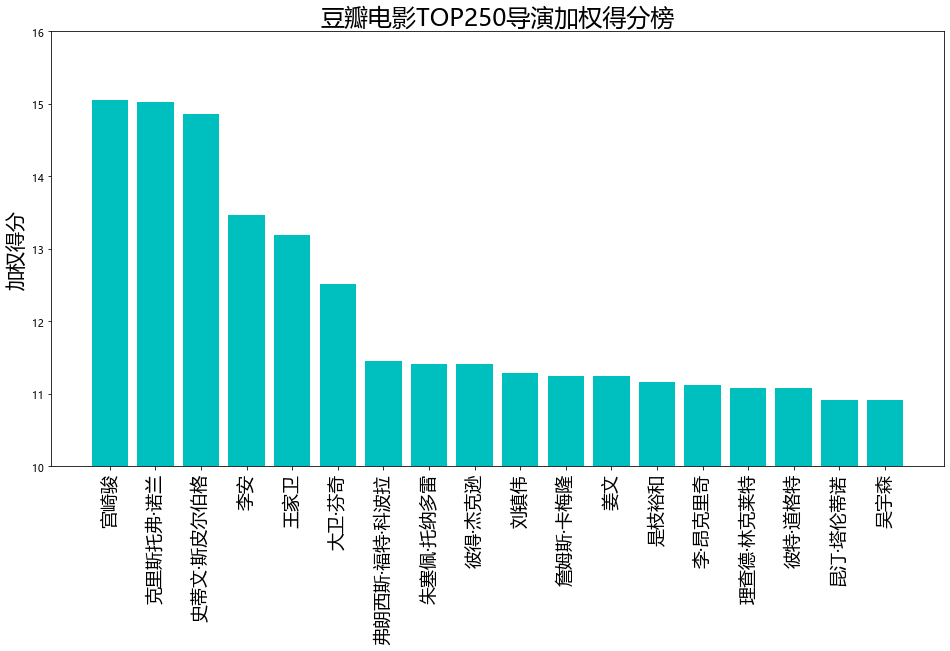

In [8]:
# 加权得分榜
rank_director_name = [i[0] for i in director_rank_score]
rank_director_score = [i[1] for i in director_rank_score]

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(rank_director_name, rank_director_score, color='c')
ax.set_xticklabels(labels=rank_director_name,
                   fontdict={
                       'fontsize': 18, 
                       'rotation': 'vertical'
                   })
plt.ylim([10,16])
plt.ylabel('加权得分', fontsize=20)
plt.title('豆瓣电影TOP250导演加权得分榜', fontsize=24)


In [9]:
# 最佳演员
actor_list = reduce(lambda x, y: x + y, df.actors)
print(len(actor_list))

actor_counter = Counter(actor_list)
actor_counter = sorted(actor_counter.items(), key=lambda x: x[1], reverse=True)
top_actors = list(filter(lambda x: x[1] >= 3, actor_counter))
print(top_actors)



4048
[('张国荣', 8), ('梁朝伟', 8), ('雨果·维文', 7), ('张曼玉', 7), ('汤姆·汉克斯', 6), ('莱昂纳多·迪卡普里奥', 6), ('琼·艾伦', 6), ('马特·达蒙', 6), ('布拉德·皮特', 6), ('伊桑·霍克', 6), ('艾伦·瑞克曼', 6), ('摩根·弗里曼', 5), ('加里·奥德曼', 5), ('迈克尔·凯恩', 5), ('约翰·拉岑贝格', 5), ('周星驰', 5), ('奥兰多·布鲁姆', 5), ('凯拉·奈特莉', 5), ('神木隆之介', 4), ('拉尔夫·费因斯', 4), ('汤姆·哈迪', 4), ('阿尔·帕西诺', 4), ('邦尼·亨特', 4), ('维果·莫腾森', 4), ('凯特·布兰切特', 4), ('安迪·瑟金斯', 4), ('姜文', 4), ('海伦娜·伯翰·卡特', 4), ('杰瑞德·莱托', 4), ('约翰·赫特', 4), ('詹妮弗·康纳利', 4), ('丹尼尔·雷德克里夫', 4), ('艾玛·沃森', 4), ('鲁伯特·格林特', 4), ('玛吉·史密斯', 4), ('汤姆·费尔顿', 4), ('朱丽·沃特斯', 4), ('邦妮·怀特', 4), ('刘嘉玲', 4), ('林青霞', 4), ('树木希林', 4), ('巩俐', 3), ('葛优', 3), ('海利·乔·奥斯蒙', 3), ('娜塔莉·波特曼', 3), ('连姆·尼森', 3), ('基里安·墨菲', 3), ('玛丽昂·歌迪亚', 3), ('拉什·费加', 3), ('杰斯·哈梅尔', 3), ('阿米尔·汗', 3), ('雅克·贝汉', 3), ('安妮·海瑟薇', 3), ('卡西·阿弗莱克', 3), ('乔什·斯图沃特', 3), ('吴孟达', 3), ('蓝洁瑛', 3), ('莫文蔚', 3), ('李健仁', 3), ('坂本千夏', 3), ('岛本须美', 3), ('鳕子', 3), ('黛安·基顿', 3), ('塔莉娅·夏尔', 3), ('艾伦·图代克', 3), ('凯蒂·洛斯', 3), ('克里斯蒂安·贝尔', 3), ('姜武', 3), ('诺玛·威登', 3), ('伊利亚·伍德'

Text(0.5, 1.0, '豆瓣电影TOP250入榜最多演员情况')

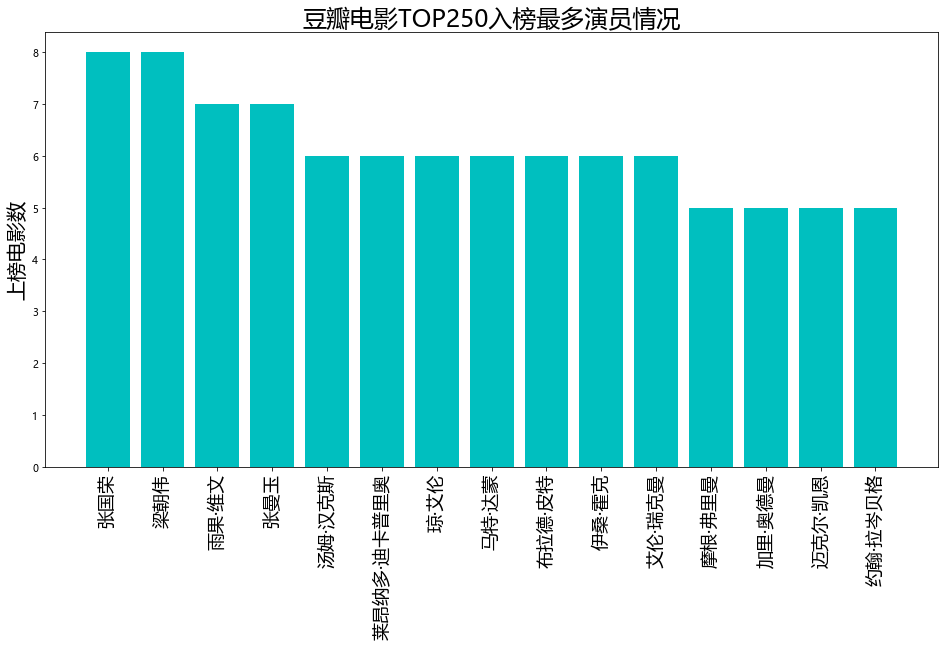

In [10]:
# 入榜电影数排行
actor_name = []
actor_cnt = []
for i in range(0, 15):
    actor_name.append(top_actors[i][0])
    actor_cnt.append(top_actors[i][1])

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(actor_name, actor_cnt, color='c')
ax.set_xticklabels(labels=actor_name, 
                   fontdict={
                       'fontsize': 18, 
                       'rotation': 'vertical'
                   })
plt.ylabel('上榜电影数', fontsize=20)
plt.title('豆瓣电影TOP250入榜最多演员情况', fontsize=24)


In [11]:
top_actor_score = defaultdict(list)
top_actor_ind = defaultdict(list)
for name, cnt in top_actors:
    for index, row in df.iterrows():
        if name in row['actors']:
            top_actor_score[name].append(row['score'])
            top_actor_ind[name].append(row['top_no'])
print(top_actor_score)  # 评分
print(top_actor_ind)  # 榜单位置


defaultdict(<class 'list'>, {'张国荣': [9.6, 8.9, 8.7, 8.7, 8.7, 8.6, 8.8, 8.5], '梁朝伟': [9.2, 8.9, 8.7, 8.7, 8.6, 8.6, 8.5, 8.4], '雨果·维文': [9.2, 9.0, 9.0, 8.9, 8.9, 8.7, 8.7], '张曼玉': [8.7, 8.8, 8.6, 8.6, 8.5, 8.5, 8.6], '汤姆·汉克斯': [9.5, 9.0, 8.9, 8.8, 8.8, 8.8], '莱昂纳多·迪卡普里奥': [9.4, 9.3, 8.9, 8.8, 8.7, 8.6], '琼·艾伦': [9.3, 8.8, 8.5, 8.8, 8.6, 8.5], '马特·达蒙': [9.3, 9.0, 8.9, 8.8, 8.6, 8.6], '布拉德·皮特': [9.0, 8.9, 8.8, 8.8, 8.5, 8.7], '伊桑·霍克': [9.1, 8.8, 8.8, 8.6, 8.8, 8.7], '艾伦·瑞克曼': [8.9, 8.8, 8.6, 8.5, 8.5, 8.5], '摩根·弗里曼': [9.7, 9.2, 8.8, 8.7, 8.6], '加里·奥德曼': [9.4, 9.2, 8.8, 8.7, 8.5], '迈克尔·凯恩': [9.3, 9.3, 9.2, 8.8, 8.7], '约翰·拉岑贝格': [9.3, 9.0, 9.0, 8.7, 8.7], '周星驰': [9.2, 9.0, 8.7, 8.6, 8.4], '奥兰多·布鲁姆': [9.2, 9.0, 9.0, 8.7, 8.6], '凯拉·奈特莉': [8.7, 8.6, 8.6, 8.6, 8.5], '神木隆之介': [9.3, 9.0, 8.8, 8.4], '拉尔夫·费因斯': [9.5, 8.8, 8.8, 8.5], '汤姆·哈迪': [9.3, 8.7, 8.6, 8.6], '阿尔·帕西诺': [9.3, 9.0, 9.2, 8.8], '邦尼·亨特': [9.2, 8.7, 8.7, 8.8], '维果·莫腾森': [9.2, 9.0, 9.0, 8.9], '凯特·布兰切特': [9.2, 9.0, 9.0, 8.9], '安迪·瑟金斯'

In [12]:
actor_rank_score = []
actor_rank_ind = []

for name, scores in top_actor_score.items():
    actor_rank_score.append([name, sum(scores) / len(scores)
                       * sqrt(log2(len(scores)))])

for name, indexes in top_actor_ind.items():
    actor_rank_ind.append(
        [name, sum(indexes) / sqrt(log2(len(scores))) / len(indexes)])

actor_rank_score = sorted(actor_rank_score, key=lambda x: x[1], reverse=True)
actor_rank_ind = sorted(actor_rank_ind, key=lambda x: x[1])

print(actor_rank_score[:10])  # 加权得分榜
print(actor_rank_ind[:10])  # 加权位置榜


[['张国荣', 15.26369774170073], ['梁朝伟', 15.068842025849234], ['雨果·维文', 14.93603115145947], ['张曼玉', 14.433376256939201], ['汤姆·汉克斯', 14.4164439872854], ['莱昂纳多·迪卡普里奥', 14.389647622996765], ['马特·达蒙', 14.255665801553592], ['伊桑·霍克', 14.14848034439905], ['布拉德·皮特', 14.121683980110419], ['琼·艾伦', 14.068091251533152]]
[['葛优', 25.417947746762966], ['姜武', 33.625826706655175], ['伊利亚·伍德', 36.53829988597176], ['西恩·奥斯汀', 36.53829988597176], ['丽芙·泰勒', 36.53829988597176], ['伊恩·麦克莱恩', 36.53829988597176], ['多米尼克·莫纳汉', 36.53829988597176], ['克里斯托弗·李', 36.53829988597176], ['约翰·瑞斯-戴维斯', 36.53829988597176], ['迈克尔·凯恩', 39.556681180899865]]


Text(0.5, 1.0, '豆瓣电影TOP250演员加权得分榜')

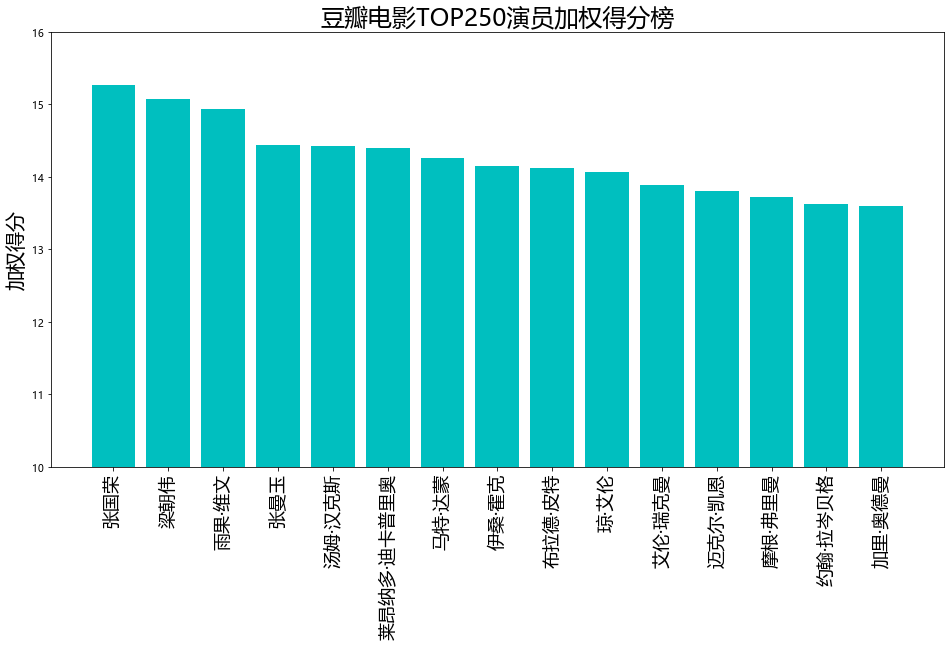

In [13]:
# 加权得分榜
actor_name = []
actor_score = []
for i in range(0,15):
    actor_name.append(actor_rank_score[i][0])
    actor_score.append(actor_rank_score[i][1])

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(actor_name, actor_score, color='c')
ax.set_xticklabels(labels=actor_name, 
                   fontdict={
                       'fontsize': 18, 
                       'rotation': 'vertical'
                   })
plt.ylim([10,16])
plt.ylabel('加权得分', fontsize=20)
plt.title('豆瓣电影TOP250演员加权得分榜', fontsize=24)



Text(0.5, 1.0, '豆瓣电影TOP250评分分布')

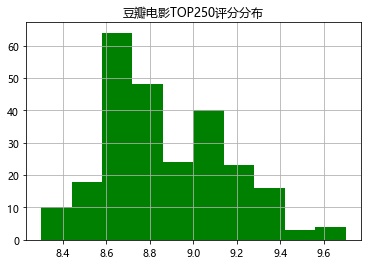

In [14]:
df.score.hist(color='green')
plt.title('豆瓣电影TOP250评分分布')


Text(0.5, 1.0, '豆瓣电影TOP250评分人数分布')

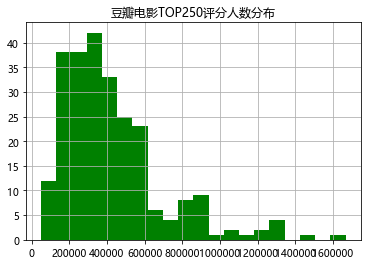

In [15]:
df.score_cnt.hist(bins=20, color='green')
plt.title('豆瓣电影TOP250评分人数分布')


Text(0.5, 1.0, '豆瓣电影TOP250分类电影分布')

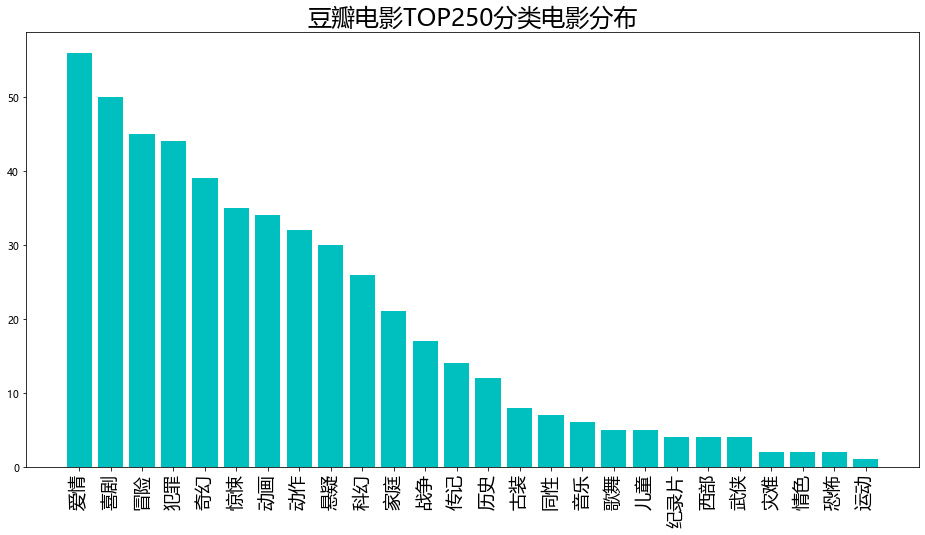

In [16]:
# 调整数据
type_list = reduce(lambda x, y: x + y, df.types)
type_counter = Counter(type_list)
type_counter = sorted(type_counter.items(), key=lambda x: x[1], reverse=True)
types = [i[0] for i in type_counter]
cnts = [i[1] for i in type_counter]

# 作图
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(types[1:], cnts[1:], color='c')
ax.set_xticklabels(
    labels=types[1:],
    fontdict={
        'rotation': 'vertical',
        'fontsize': 18
    })
ax.set_title('豆瓣电影TOP250分类电影分布', fontsize=24)


In [17]:
df.corr()


,score,score_cnt,top_no,length,had_seen,want_see,short_review,review,ask,discussion,year,five_star_rate,favor_rate,better_than
score,1.000000,0.315311,-0.707974,0.214055,0.279622,0.366693,0.246040,0.185436,0.039566,0.144889,-0.312900,0.982699,0.949960,0.587971
score_cnt,0.315311,1.000000,-0.639462,0.118956,0.962289,0.321597,0.905066,0.720013,0.251359,0.602686,0.212452,0.325069,0.259013,0.227251
top_no,-0.707974,-0.639462,1.000000,-0.194254,-0.587548,-0.374548,-0.518289,-0.365099,-0.120157,-0.287061,0.047517,-0.695480,-0.672270,-0.509184
length,0.214055,0.118956,-0.194254,1.000000,0.094274,0.111099,0.068665,0.105372,0.108926,0.133273,-0.110545,0.219009,0.159849,0.210572
had_seen,0.279622,0.962289,-0.587548,0.094274,1.000000,0.398734,0.884648,0.770163,0.212416,0.690002,0.190343,0.286619,0.224918,0.200856
want_see,0.366693,0.321597,-0.374548,0.111099,0.398734,1.000000,0.495335,0.605874,0.113664,0.558050,0.042439,0.362232,0.382233,0.205527
short_review,0.246040,0.905066,-0.518289,0.068665,0.884648,0.495335,1.000000,0.866370,0.381617,0.699990,0.341383,0.266203,0.201510,0.155699
review,0.185436,0.720013,-0.365099,0.105372,0.770163,0.605874,0.866370,1.000000,0.276596,0.802985,0.291063,0.213791,0.133363,0.042140
ask,0.039566,0.251359,-0.120157,0.108926,0.212416,0.113664,0.381617,0.276596,1.000000,0.164233,0.231980,0.049588,0.026470,0.052137
discussion,0.144889,0.602686,-0.287061,0.133273,0.690002,0.558050,0.699990,0.802985,0.164233,1.000000,0.218400,0.163281,0.103085,0.118175


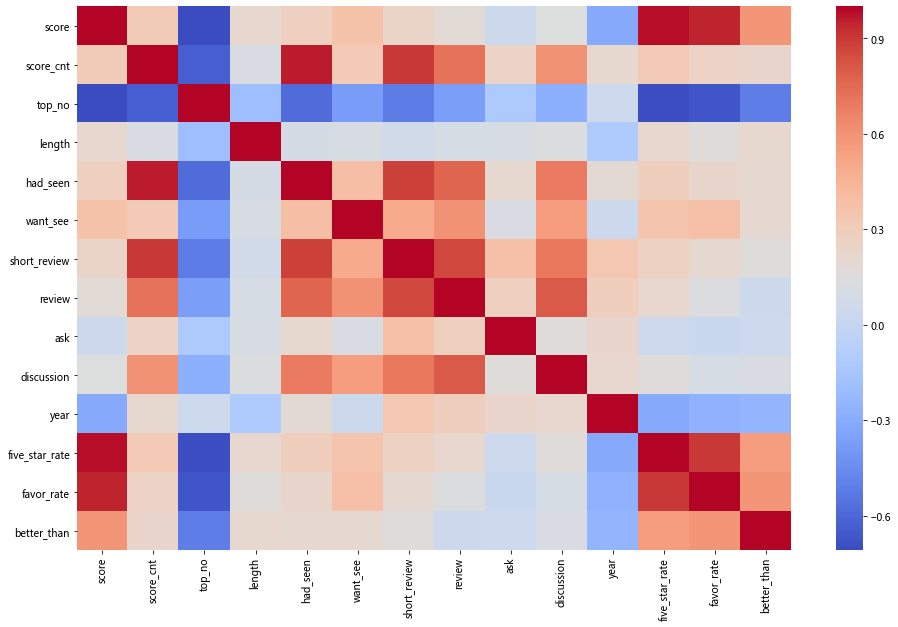

In [18]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


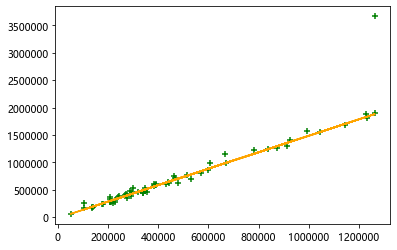

In [19]:

lr = LinearRegression(fit_intercept=True)
X = df['score_cnt'].values
y = df['had_seen'].values
X.shape = (len(X), 1)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 训练模型
lr.fit(X_train, y_train)

# 预测
y_pred = lr.predict(X_test)

# 画图
plt.scatter(X_test, y_test, color='green', marker='+')
plt.plot(X_test, y_pred, '-', color='orange')
plt.show()


In [20]:
print(lr.coef_, lr.intercept_)
# [1.63808659] -62105.59721617866


[1.50160832] -17024.52928980859


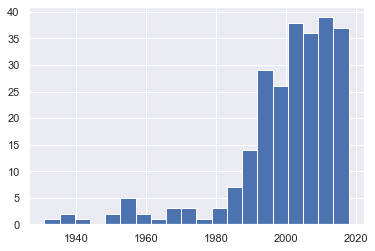

In [21]:
sns.set()
df.year.hist(bins=20)


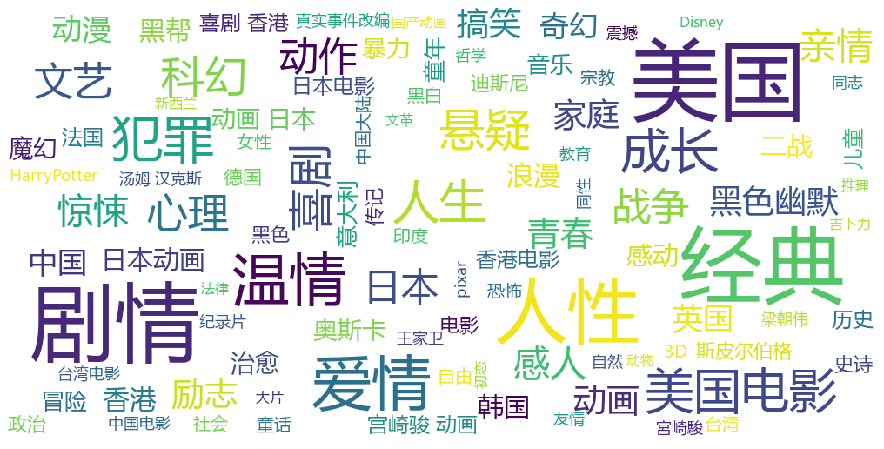

In [22]:

# 生成数据，每个词之间以空格分离
tags = reduce(lambda x, y: x + y, df.tags)
result = ' '.join(tags)

# 设置词云属性，注意要指定中文字体
wc = WordCloud(
    font_path= r'C:\Windows\Fonts\msyh.ttc',  # 字体
    background_color='white',  # 背景颜色
    width=1000,
    height=500,
    max_font_size=100,  # 字体大小
    min_font_size=10,
    max_words=100
)

# 生成云词对象
wc.generate(result)

# 展示词云
plt.figure('豆瓣电影标签', figsize=(16, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()
